In [13]:
#! pip install faraway

### Step 0

In [16]:
# CodeGrade step0

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve



### Step 1

*  [Data](https://rdrr.io/cran/faraway/man/pima.html)
*  [Faraway](https://pypi.org/project/faraway/)

In [34]:
# CodeGrade step0

# Load the Dataset from faraway
from faraway.datasets import pima

# Load the dataset
data = pima.load()

# Convert 'diabetes' column to int type to represent classes 0 and 1
data['diabetes'] = data['diabetes'].astype(int)
data = data[data['diabetes'].isin([0, 1])]



In [35]:
# Display the first few rows and info
data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0,50,1
1,1,85,66,29,0,26.6,0,31,0
2,8,183,64,0,0,23.3,0,32,1
3,1,89,66,23,94,28.1,0,21,0
5,5,116,74,0,0,25.6,0,30,0


In [36]:
# CodeGrade step1

# Shape
data.shape

(764, 9)

### Step 2

In [37]:
# CodeGrade step2

#  Define Features and Scale the Data
features = ['glucose', 'bmi', 'insulin', 'age', 'test', 'triceps', 'insulin', 'diastolic']
target = 'diabetes'

# Define features (X) and target (y)
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets; set seed to 42
# Use the usual naming convention
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Give the shapes separated by commas
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (611, 8)
Testing set shape: (153, 8)


### Step 3


In [38]:
# CodeGrade step3

# Build and Train the Logistic Regression Model
# Instantiate the logistic regression model
# Call this a model
model = LogisticRegression(max_iter=1000)

# Train the model on the training set
model.fit(X_train, y_train)


# Predict probabilities and classes; call these y_pred_proba and y_pred
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix, call this and then return it as cm
cm = confusion_matrix(y_test, y_pred)


Unique values in y_test: [0 1]
Unique values in y_pred: [0]
Unique values in the target (y): [0 1]


### Step 4

In [39]:
# CodeGrade step4

# CAll the classification report "report"; return the precision for '0'

report = classification_report(y_test, y_pred)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


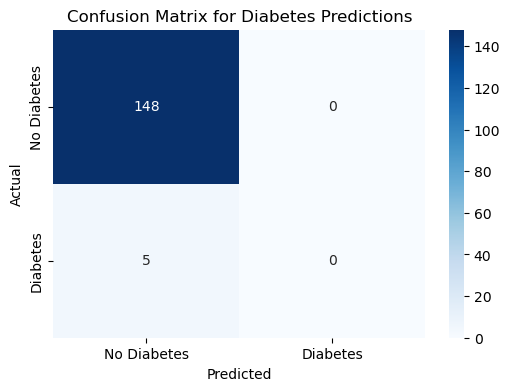

In [41]:
# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Diabetes Predictions')
plt.show()

### Step 5

In [44]:
# CodeGrade step5

# Calculate AUC, call this auc
auc = roc_auc_score(y_test, y_prob)

# Calculate ROC curve by finding fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Return the following
auc, sum(fpr), sum(tpr), sum(thresholds)

(0.681081081081081, 3.331081081081081, 4.8, inf)

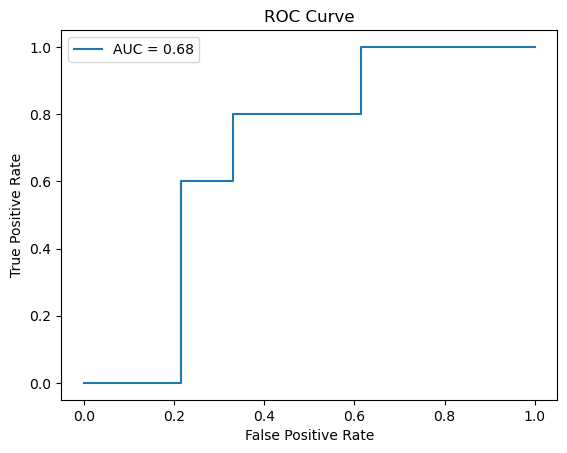

In [45]:
# Print ROC Curve
print(
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()